Title: Clustering Algorithms
Date: 2019-05-05 17:00
Tags: python
Slug: clustering
    
Clustering is the act of assembling data points into distinct groups whereby each group or cluster is made up of observations that are similar to one another, and different from observations in other clusters in some fashion. Clustering falls into the category of unsupervised machine learning, where we don't explicitly tell algorithms what to output, as we do in classification (is this e-mail spam or not spam?) and regression (how much does this house cost?) problems. Instead, clustering algorithms identify hidden structures and patterns in the data and reveal groupings that we didn't know existed.

In this blog post, I'm going to explore and explain different clustering algorithms. Data science courses tend to only cover k-means (the hello world! of clustering), leaving the rest out to be discovered/played around with on one's own as the need to dive deeper into clustering arises, perhaps in the work place or for a particular project. Granted, once one understands the principles and underlying concepts of one clustering algorithm, the rest start to seem pretty straightforward - but i still think there is value to be gained from knowing at least the basics of more than one clustering algorithm from the get-go. 

#### K-Means Clustering
----

As mentioned, K-means is the most popular clustering algorithm. In K-means, the user specifies the number of clusters they want to create in the data - which is what we call `K`. The algorithm takes this K, finds that many number of `centroids` (points representing the center of their respective cluster) in the data, iterates over the entire dataset and assigns each observation to a cluster based on what centroid they are closest to, using the `Eucledian Distance` measurement. 

The process of finding centroids and iterating over observations to assign them to a centroid is repeated until the best set of centroid points are found - ones which maximize the distance between clusters (`silhouette score`) and minimize the distance between observations within clusters (`inertia`). 

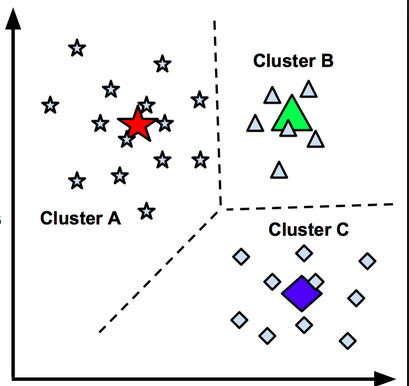

In [1]:
from IPython.display import Image
Image(filename='k-means.png')

#### Fuzzy C-Means Clustering
----

Fuzzy C-Means clustering is conceptually very similar to K-means clustering. Fuzzy C-means assigns observations membership probabilities of belonging to certain clusters instead of assigning each observation to a particular cluster. The notion of "x belongs to cluster 1" is thus replaced with "x belongs to cluster 1 with 80% probability, cluster 2 with 16% probability, and cluster 3 with 4% probability." Fuzzy C-Means Clustering can be implemented using the `sklearn-fuzzy` library, which includes other algorithms using the fuzzy logic. 

The `Fuzzy Partition Coefficient` or `FCP` in short is a metric that denotes how cleanly the data is described by a certain model. Fuzzy C-Means Clustering can be an especially useful replacement to K-Means in situations where we don't know what number K to specifiy, as we can try out a bunch of C's with Fuzzy C-Means and choose the number that delivers the highest FPC, as demonstrated below. This is equivalent to trying out a bunch of K's with K-means and seeing how well separated the clusters are in each modified version, but, is a bit more scientifically sound as we are relying on a numerical metric instead of pure visual inspection.  

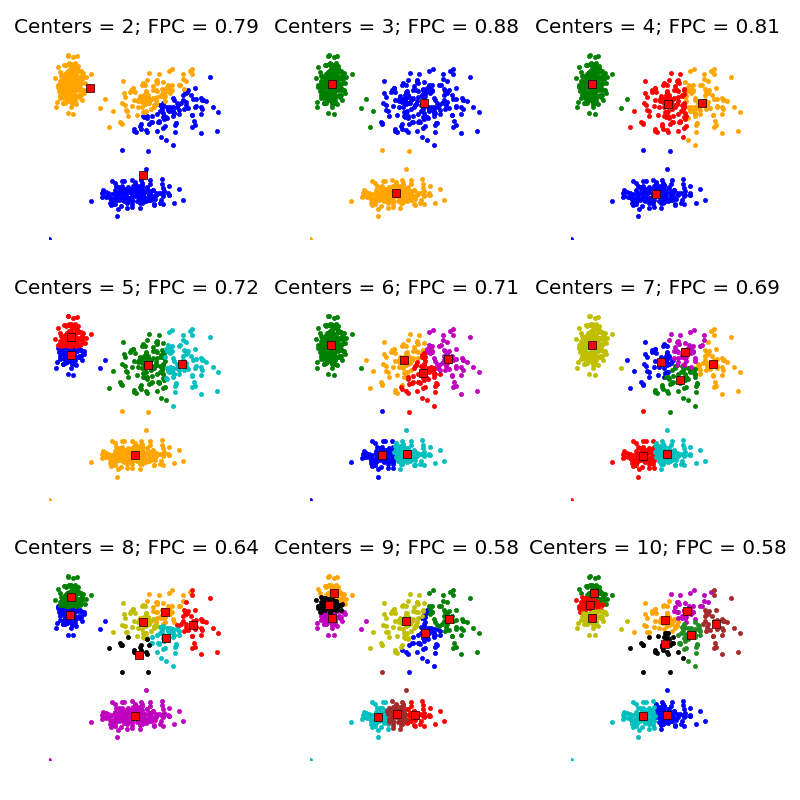

In [2]:
Image(filename='fuzzy_c-means.png')

#### Density-Based Spatial Clustering of Applications with Noise
----

Density-Based Spatial Clustering of Applications with Noise is quite a mouthful, so it is commonly referred to as `DBSCAN`. 

In DBSCAN, clusters are found by identifying areas with high density in the dataset. DBSCAN takes two user-specified inputs: `eps`, the maximum distance two samples in the same cluster can have and  `min_samples`, the minimum number of observations a grouping needs to include for it to be considered a cluster. With these inputs, the algorithm checks each observation in the dataset to see if there are more than `min_samples` observations within a distance of `eps`, until all data points in the dataset are visited. 

Unlike other clustering algorithms, all observations are not necessarily assigned to a cluster in DBSCAN. Those points that don't satisfy the `eps` and `min_samples` conditions are left out as noise points. 

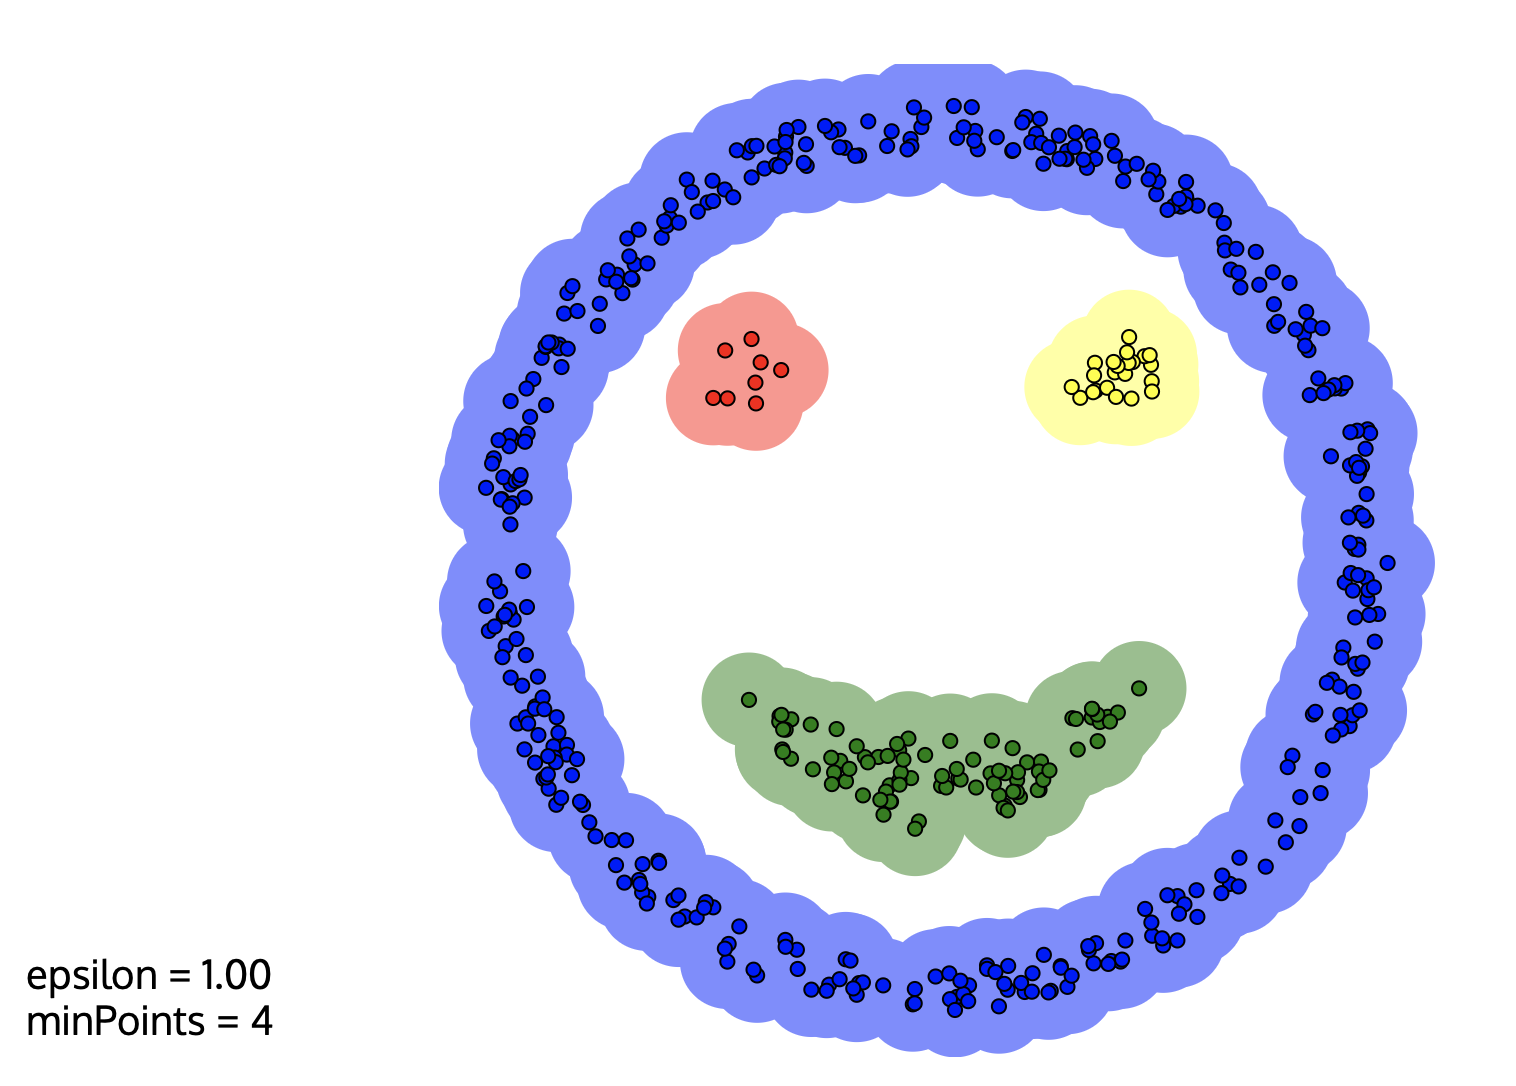

In [4]:
Image(filename='DBSCAN.png')

#### Agglomerative Hierarchical Clustering
----

Agglomerative Hierarchical clustering is a clustering method which builds clusters using a `hierarchical bottom-up approach`. At the beginning, all data points are considered to be a cluster on their own, and are successively agglomerated in groups of two based on some distance metric, until a single cluster is left. 

Results of agglomerative hierarchical clustering can be shown using a tree-like diagram called a `dendrogram`, one example of which is given below. We start at the bottom where y=0 and go up sequentially as the clusters are agglomerated. The height in the dendrogram at which two clusters merge represents the distance between them prior to the merge.

The point at which to stop merging clusters must be specified by the data owner based on domain knowledge, but the dendrogram can help in some cases. Though this is not a hard and fast rule:

> *The best choice for the number of clusters in agglomerative hierarchical clustering is the number of vertical lines in the dendrogram when cut by two horizontal lines that transverse the maximum vertical distance in the dendrogram without intersecting a cluster.*

In the below example, the stopping point according to this rule would be at 4 clusters.  

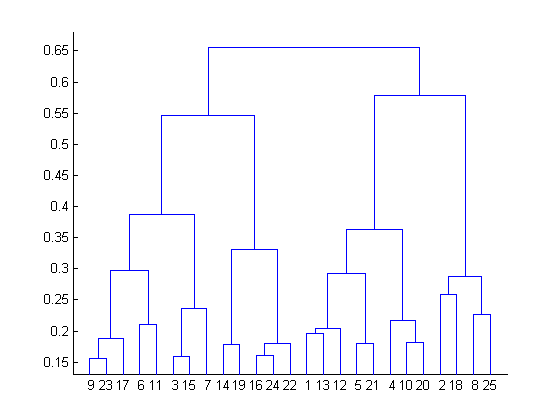

In [8]:
Image(filename='dendrogram.png')

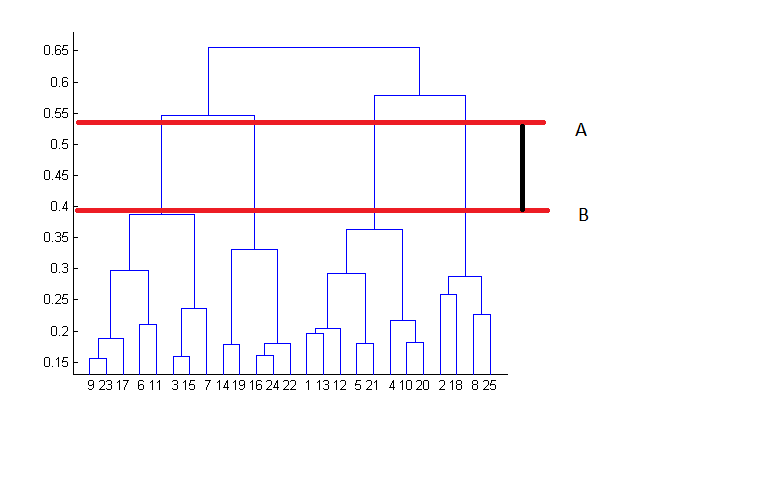

In [9]:
Image(filename='dendrogram-2.png')

#### Affinity Propagation
----

This is a really weird sounding algorithm, so bear with me. 

Affinity Propagation works by finding observations that are representative of the cluster they are a member of, called `exemplars`. In Affinity Propagation, data points are seen as a network in which messages are sent back and forth between pairs of samples. Exemplars are found through this concept of message-passing whereby samples communicate their suitability to be examplars.  

These messages get stored in `responsability` (how fit a sample is to serve as the exemplar of the other sample) and `availability` (how appropriate it would be for a sample to pick the other sample as its exemplar, taking into account other points' preference for that sample as an exemplar) matrices and get updated iteratively in response to messages from other pairs. In the end, observations whose responsibility and availability for themselves is positive are chosen as the examplars.

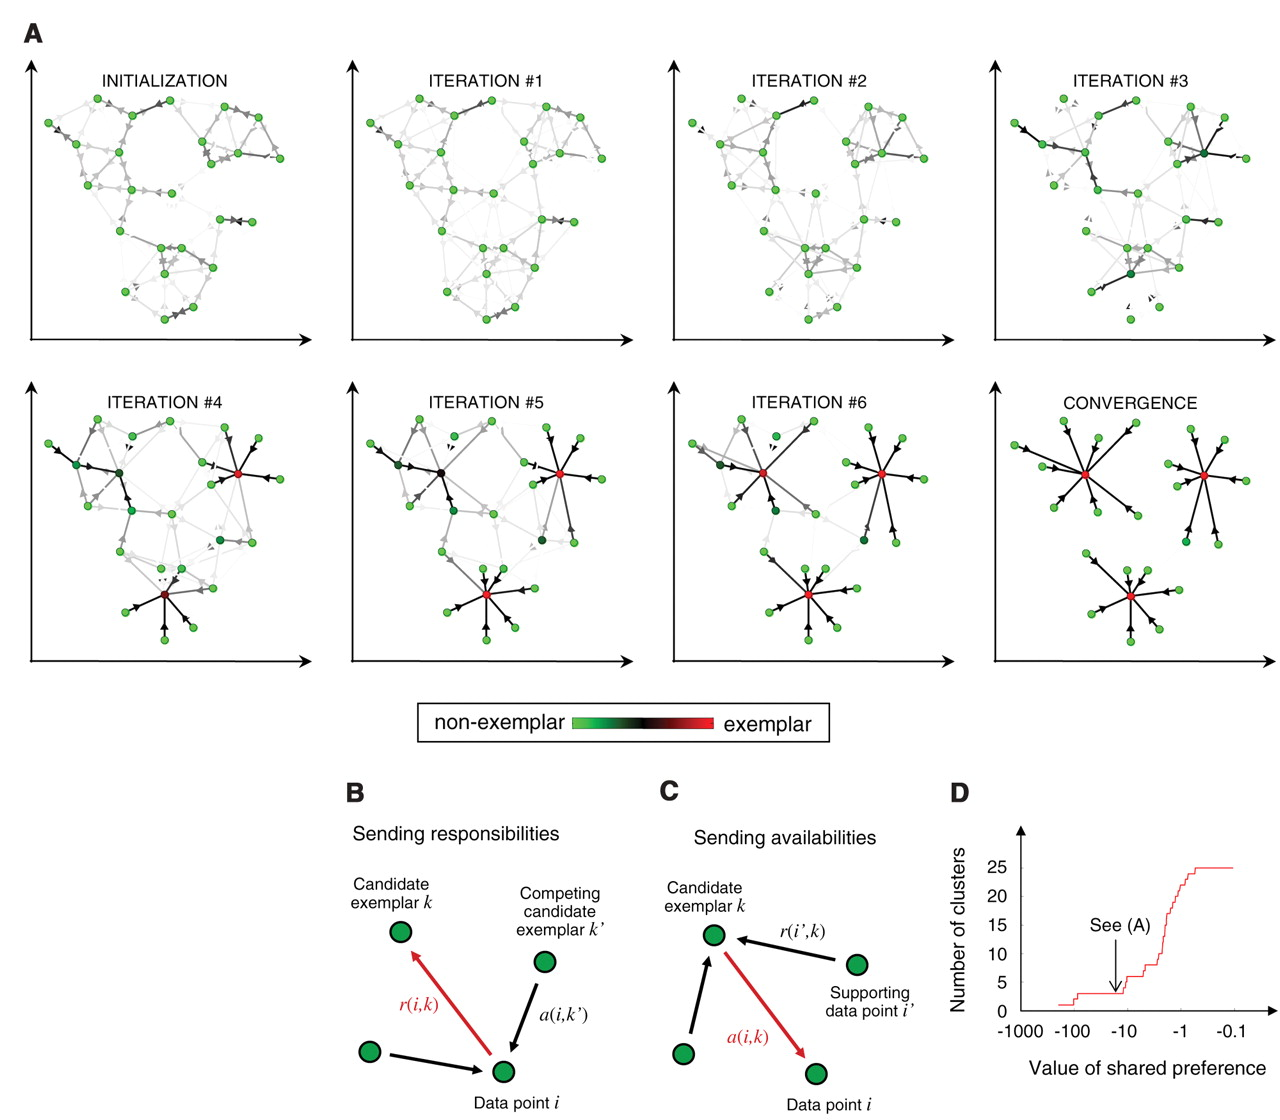

In [12]:
Image(filename='affinity.jpg')

#### Mean Shift Clustering
----

Mean Shift clustering is a `centroid` based algorithm like K-means which seeks to find the center points for each cluster. It works by shifting a a circle whose radius is called `bandwidth` iteratively through the data points to higher density regions. At every iteration, the algorithm computes the mean of all the points that fall within the circle, and shifts the center of the circle towards that mean - hence the name `mean shift`. The shifting continues until there is no direction the circle can be shifted to that will result in more points contained within the circle. 

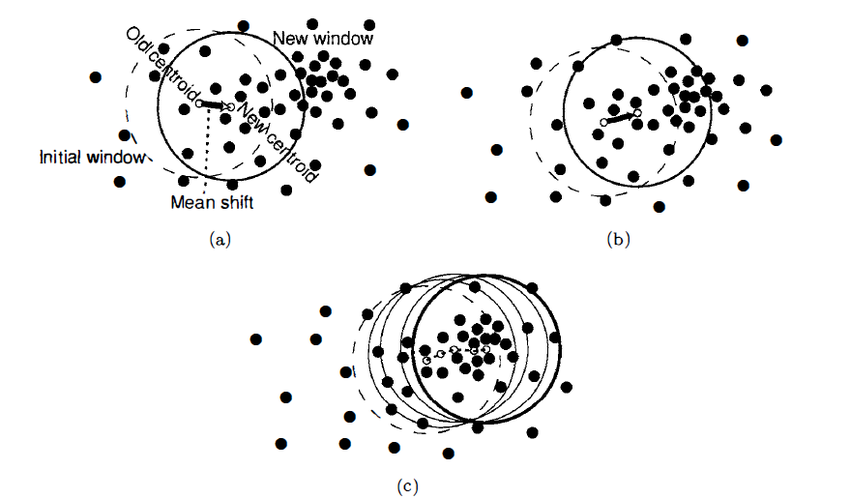

In [13]:
Image(filename='mean_shift.png')